In [4]:
import pyvista as pv

In [2]:
filename1 = '../../../Datasets/WaveSuite_VTK/sateNo4_1_41.vtu'
filename2 = '../../../Datasets/WaveSuite_VTK/sateNo4_1_50.vtu'
filename3 = '../../../Datasets/WaveSuite_VTK/sateNo4_1_70.vtu'

sample1 = pv.read(filename1)
sample2 = pv.read(filename2)
sample3 = pv.read(filename3)

In [3]:
#Create the plot mesh
def plot_samples(sample_list, feature_select='nut', 
                 set_pred_labels_as=['X coordinate','Y coordinate, with edges'] , 
                save_fig=False, filename='no_name.eps' ):
    
    pl = pv.Plotter(shape=(len(sample_list), 3))
    
    for i, sample in enumerate(sample_list):
        
        pl.subplot(i, 0)
        mesh = sample # template.copy()
        # mesh[feature_select] = y_real1[i]
        mesh.set_active_scalars(feature_select)
        
        #single_slice = mesh.slice(normal=[0, 1, 0])
        all_slice = mesh.slice_orthogonal()
        pl.add_mesh(all_slice, clim=[0, 0.32] , cmap='plasma')
        #pl.camera_position = 'xz'
        #pl.camera.zoom(1.7)
        pl.add_text('Orthogonal slices', font_size=10)
        
        pl.subplot(i, 1)
        mesh = sample # template.copy()
        #mesh[feature_select] = y_pred1[i]
        mesh.set_active_scalars(feature_select)
        
        single_slice = mesh.slice(normal=[1, 0, 0])
        pl.add_mesh(single_slice, clim=[0, 0.32] , cmap='plasma')  #, show_edges=show_edges, reset_camera=True
        pl.camera_position = 'yz'
        pl.camera.zoom(1.7)
        pl.add_text(set_pred_labels_as[0], font_size=10) #"Model1 Predictions"
        
        pl.subplot(i, 2)
        mesh = sample # template.copy()
        #mesh[feature_select] = y_pred2[i]
        mesh.set_active_scalars(feature_select)
        
        single_slice = mesh.slice(normal=[0, 1, 0])
        pl.add_mesh(single_slice, clim=[0, 0.4] , cmap='plasma', show_edges=True)  #, show_edges=show_edges, reset_camera=True
        pl.camera_position = 'xz'
        pl.camera.zoom(1.7)
        pl.add_text(set_pred_labels_as[1], font_size=10) #"Model2 Predictions"
        
    if save_fig:
        pl.save_graphic(filename) # 'saved_figures/' +  
    
    pl.show()

In [4]:
sample_list = [sample1, sample2, sample3]

C:\Users\angel\Anaconda3\envs\second-try-alienware\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


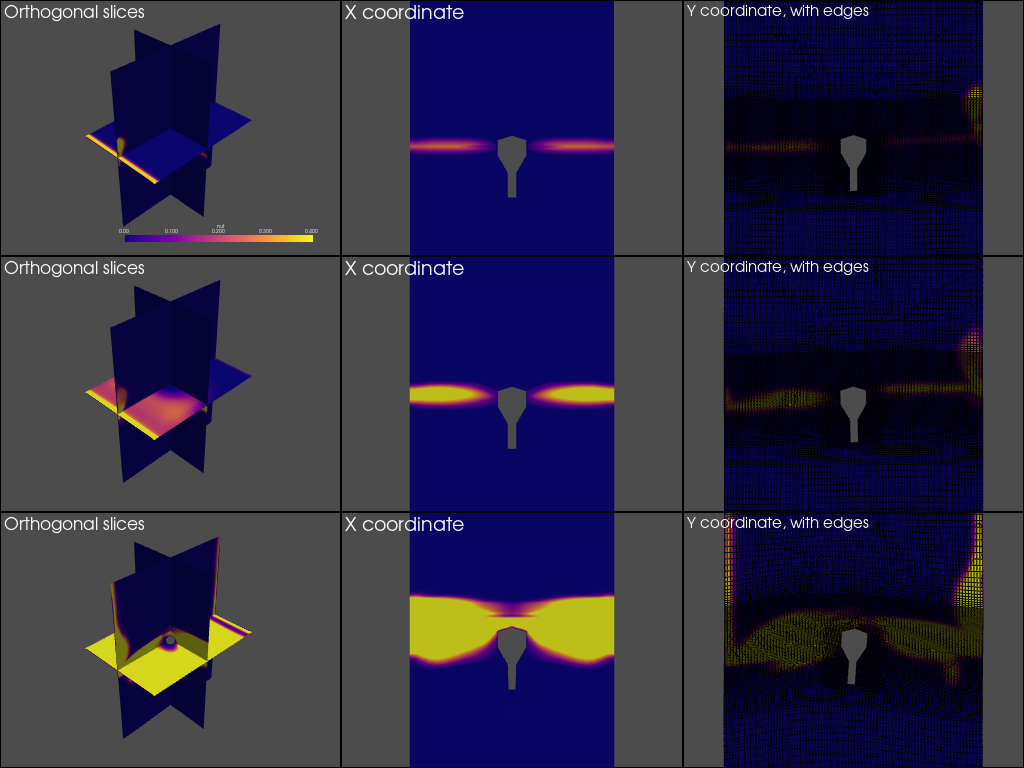

In [5]:
plot_samples(sample_list, save_fig=True, filename='WaveSuite_3samples.eps')

# And also plot samples for the air pollution dataset

In [50]:
air_filename1 = '../../../Datasets/air_pollution_data/2d_canyon_0.vtu'
air_filename2 = '../../../Datasets/air_pollution_data/2d_canyon_80.vtu'
air_filename3 = '../../../Datasets/air_pollution_data/2d_canyon_350.vtu'

air_sample1 = pv.read(air_filename1)
air_sample2 = pv.read(air_filename2)
air_sample3 = pv.read(air_filename3)

In [51]:
air_sample_list = [air_sample1, air_sample2, air_sample3]

In [52]:
#Create the plot mesh
def plot_air_samples(sample_list, feature_select='TracerBackground',
                save_fig=False, filename='no_name.eps' ):
    
    pl = pv.Plotter(shape=(len(sample_list), 2))
    
    for i, sample in enumerate(sample_list):
        
        pl.subplot(i, 0)
        mesh = sample 
        mesh.set_active_scalars(feature_select)
        pl.camera_position = 'xy'
        pl.add_mesh(mesh, reset_camera=True) 
        pl.camera.zoom(1.8)
        #pl.add_text('edges_included', font_size=10)
        
        pl.subplot(i, 1)
        mesh = sample 
        mesh.set_active_scalars(feature_select)
        pl.camera_position = 'xy'
        pl.add_mesh(mesh, reset_camera=True, show_edges=True)
        pl.camera.zoom(1.8)
        pl.add_text('edges_included', font_size=10) #"Model1 Predictions"
        
    if save_fig:
        pl.save_graphic(filename) # 'saved_figures/' +  
    
    pl.show()

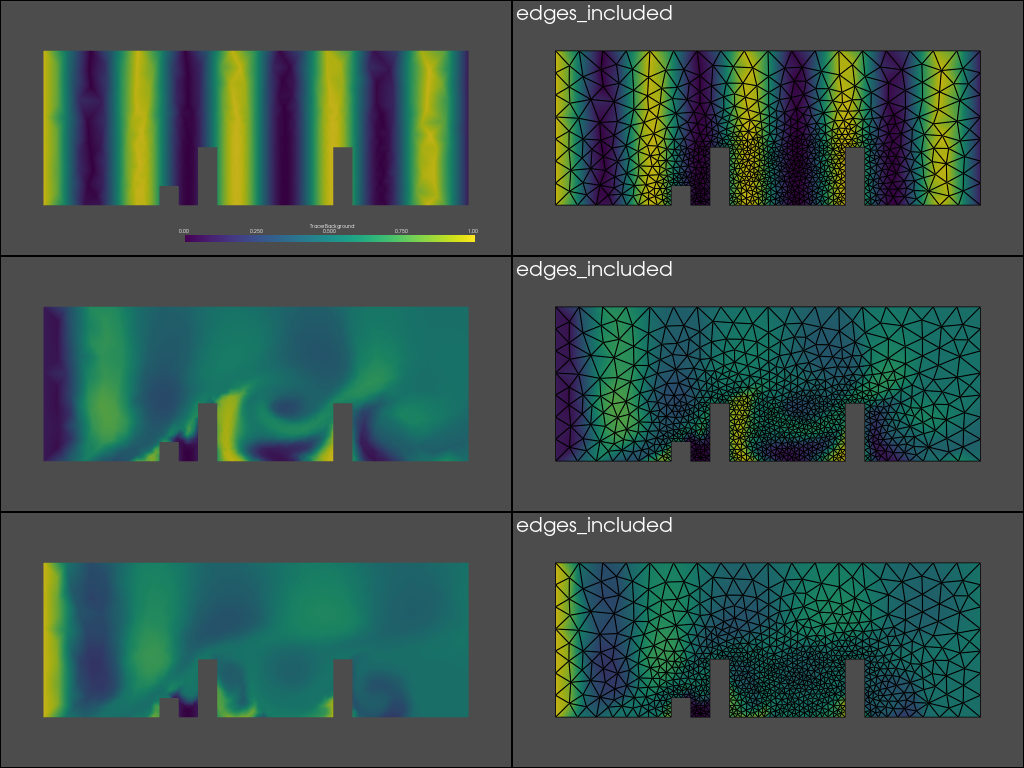

In [53]:
plot_air_samples(air_sample_list) #, save_fig=True, filename='WaveSuite_3samples.eps'